- Seed the random number generator with 42.
- Compute the mean time (in units of number of games) between no-hitters.
- Draw 100,000 samples from an Exponential distribution with the parameter you computed from the mean of the inter-no-hitter times.
- Plot the theoretical PDF using plt.hist(). Remember to use keyword arguments bins=50, normed=True, and histtype='step'. Be sure to label your axes.
- Show your plot.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

nohitter = pd.read_csv("mlb_nohitters.csv")
print(nohitter.columns)

Index(['date', 'game_number', 'winning_team', 'losing_team',
       'winning_pitcher'],
      dtype='object')


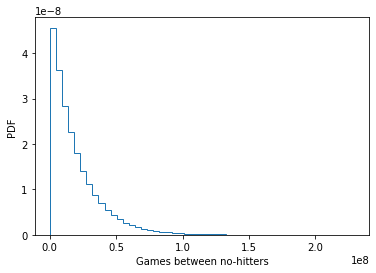

In [5]:
nohitter_times = nohitter['date']
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = nohitter_times.mean()

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_time,
             bins=50, density=True, histtype='step')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


- Compute an ECDF from the actual time between no-hitters (nohitter_times). Use the ecdf() function you wrote in the prequel course.
- Create a CDF from the theoretical samples you took in the last exercise (inter_nohitter_time).
- Plot x_theor and y_theor as a line using plt.plot(). Then overlay the ECDF of the real data x and y as points. To do this, you have to specify the keyword arguments marker = '.' and linestyle = 'none' in addition to x and y inside plt.plot().
- Set a 2% margin on the plot.
- Show the plot.

In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


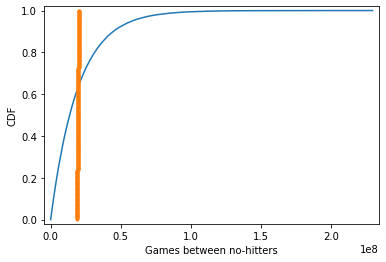

In [7]:
# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

- Take 10000 samples out of an Exponential distribution with parameter  = tau/2.
- Take 10000 samples out of an Exponential distribution with parameter  = 2*tau.
- Generate CDFs from these two sets of samples using your ecdf() function.
- Add these two CDFs as lines to your plot. This has been done for you, so hit submit to view the plot!

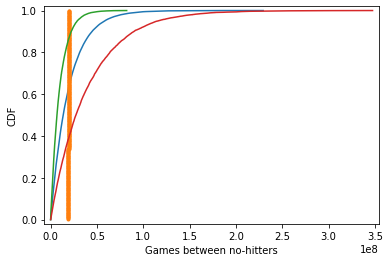

In [8]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, size = 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau * 2, size = 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

- Plot fertility (y-axis) versus illiteracy (x-axis) as a scatter plot.
- Set a 2% margin.
- Compute and print the Pearson correlation coefficient between illiteracy and fertility.

In [9]:
females = pd.read_csv("female_literacy_fertility.csv")
print(females.columns)

Index(['Country ', 'Continent', 'female literacy', 'fertility', 'population'], dtype='object')


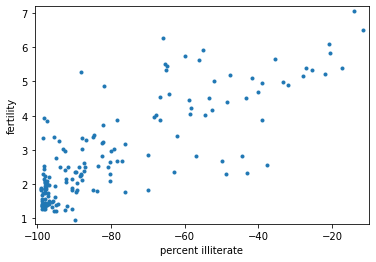

0.8041324026815345


In [14]:
illiteracy = 1 - females['female literacy']
fertility = females['fertility']
from scipy.stats import pearsonr

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearsonr(illiteracy, fertility)[0])


- Compute the slope and intercept of the regression line using np.polyfit(). Remember, fertility is on the y-axis and illiteracy on the x-axis.
- Print out the slope and intercept from the linear regression.
- To plot the best fit line, create an array x that consists of 0 and 100 using np.array(). Then, compute the theoretical values of y based on your regression parameters. I.e., y = a * x + b.
- Plot the data and the regression line on the same plot. Be sure to label your axes.
- Hit submit to display your plot.

slope = 0.0497985480906342 children per woman / percent illiterate
intercept = 6.818106871609343 children per woman


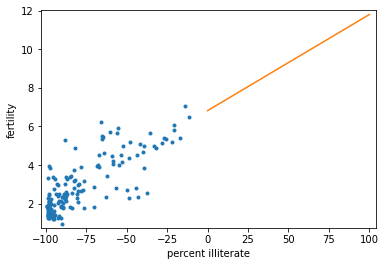

In [15]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x =  np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


- Specify the values of the slope to compute the RSS. Use np.linspace() to get 200 points in the range between 0 and 0.1. For example, to get 100 points in the range between 0 and 0.5, you could use np.linspace() like so: np.linspace(0, 0.5, 100).
- Initialize an array, rss, to contain the RSS using np.empty_like() and the array you created above. The empty_like() function returns a new array with the same shape and type as a given array (in this case, a_vals).
- Write a for loop to compute the sum of RSS of the slope. Hint: the RSS is given by `np.sum((y_data - a * x_data - b)**2)`. The variable b you computed in the last exercise is already in your namespace. Here, fertility is the y_data and illiteracy the x_data.
- Plot the RSS (rss) versus slope (a_vals).
- Hit submit to see the plot!

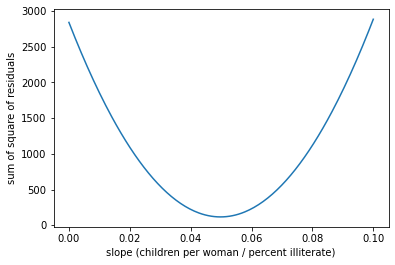

In [16]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0 , 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot( a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()


Why should exploratory data analysis be the first step in an analysis of data (after getting your data imported and cleaned, of course)?
- You can be protected from misinterpretation of the type demonstrated by Anscombe's quartet.
- EDA provides a good starting point for planning the rest of your analysis.
- EDA is not really any more difficult than any of the subsequent analysis, so there is no excuse for not exploring the data.

- Compute the parameters for the slope and intercept using np.polyfit(). The Anscombe data are stored in the arrays x and y.
- Print the slope a and intercept b.
- Generate theoretical  and  data from the linear regression. Your  array, which you can create with np.array(), should consist of 3 and 15. To generate the  data, multiply the slope by x_theor and add the intercept.
- Plot the Anscombe data as a scatter plot and then plot the theoretical line. Remember to include the marker='.' and linestyle='none' keyword arguments in addition to x and y when to plot the Anscombe data as a scatter plot. You do not need these arguments when plotting the theoretical line.
- Hit submit to see the plot!

In [46]:
anscombe = pd.read_csv("anscombe.csv")
print(anscombe.columns)
# x =anscombe.index.astype(float)
x = anscombe['0'].iloc[1:].astype(float)
y = anscombe['0.1'].iloc[1:].astype(float)

anscombe_x = []
anscombe_y = []

def col_processor(col):
    return anscombe[col].iloc[1:].astype(float)
xs = ['0', '1', '2', '3']
ys = ['0.1', '1.1', '2.1', '3.1']

for each_x in xs:
    result = col_processor(each_x)
    anscombe_x.append(result)
for each_y in ys:
    result = col_processor(each_y)
    anscombe_y.append(result)    
    


Index(['0', '0.1', '1', '1.1', '2', '2.1', '3', '3.1'], dtype='object')


0.5000909090909094 3.000090909090908


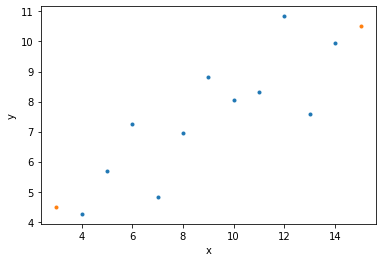

In [47]:
# x = anscombe['0']
# y = anscombe['0.1']

# Perform linear regression: a, b
a, b = np.polyfit(x, y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.' , linestyle='none')
_ = plt.plot(x_theor, y_theor, marker='.' , linestyle='none')

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

- Write a for loop to do the following for each Anscombe data set.
- Compute the slope and intercept.
- Print the slope and intercept.

In [48]:
# Iterate through x,y pairs
for x, y in zip(anscombe_x , anscombe_y ):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x,y, 1)

    # Print the result
    print('slope:', a, 'intercept:', b)


slope: 0.5000909090909094 intercept: 3.000090909090908
slope: 0.5000000000000003 intercept: 3.00090909090909
slope: 0.49972727272727313 intercept: 3.0024545454545453
slope: 0.4999090909090908 intercept: 3.001727272727274
